## 1. Importing Data

In [2]:
#importing libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#adding the data for chicago year 2022
data = pd.read_csv('2022_all_year.csv')

## 2. Preprocessing Data

Looking at the column in the data

In [4]:
data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')

Dropping any unecessary column

In [5]:
data = data.drop(data.columns[[0,1,3,4,7,9,10,11,12,13,14,17,18,21,22,23,24,25,26,27,28,29]],axis=1)
#axis = 1 means that the operation are perform on the columns of the DataFrame

In [6]:
data.columns

Index(['Date', 'Primary Type', 'Description', 'Arrest', 'X Coordinate',
       'Y Coordinate', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
data.head(15)

,Date,Primary Type,Description,Arrest,X Coordinate,Y Coordinate,Latitude,Longitude
0,12/31/2022 11:50:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,False,1165385.0,1946614.0,42.009108,-87.666844
1,12/31/2022 11:50:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,False,1139357.0,1900199.0,41.882257,-87.763744
2,12/31/2022 11:47:00 PM,ASSAULT,SIMPLE,True,1167940.0,1844124.0,41.727812,-87.660399
3,12/31/2022 11:47:00 PM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,True,1167940.0,1844124.0,41.727812,-87.660399
4,12/31/2022 11:45:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,False,1169346.0,1830494.0,41.690379,-87.655642
5,12/31/2022 11:45:00 PM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,True,1173883.0,1905665.0,41.896557,-87.636802
6,12/31/2022 11:45:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,1142695.0,1899189.0,41.879424,-87.751512
7,12/31/2022 11:45:00 PM,BATTERY,SIMPLE,False,1177394.0,1901277.0,41.884437,-87.624040
8,12/31/2022 11:44:00 PM,CRIMINAL TRESPASS,TO LAND,False,1163051.0,1889068.0,41.851248,-87.677052
9,12/31/2022 11:44:00 PM,CRIMINAL DAMAGE,TO PROPERTY,False,NaN,NaN,NaN,NaN


removing the rows with any NaN

In [8]:
data = data.dropna()
data

,Date,Primary Type,Description,Arrest,X Coordinate,Y Coordinate,Latitude,Longitude
0,12/31/2022 11:50:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,False,1165385.0,1946614.0,42.009108,-87.666844
1,12/31/2022 11:50:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,False,1139357.0,1900199.0,41.882257,-87.763744
2,12/31/2022 11:47:00 PM,ASSAULT,SIMPLE,True,1167940.0,1844124.0,41.727812,-87.660399
3,12/31/2022 11:47:00 PM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,True,1167940.0,1844124.0,41.727812,-87.660399
4,12/31/2022 11:45:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,False,1169346.0,1830494.0,41.690379,-87.655642
...,...,...,...,...,...,...,...,...
237351,01/01/2022 12:00:00 AM,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,False,1169722.0,1917469.0,41.929039,-87.651740
237352,01/01/2022 12:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,False,1191357.0,1852335.0,41.749809,-87.574354
237353,01/01/2022 12:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,1166434.0,1861907.0,41.776643,-87.665410
237355,01/01/2022 12:00:00 AM,THEFT,OVER $500,False,1165777.0,1899437.0,41.879643,-87.666751


Looking at the data yype of each column

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233173 entries, 0 to 237357
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          233173 non-null  object 
 1   Primary Type  233173 non-null  object 
 2   Description   233173 non-null  object 
 3   Arrest        233173 non-null  bool   
 4   X Coordinate  233173 non-null  float64
 5   Y Coordinate  233173 non-null  float64
 6   Latitude      233173 non-null  float64
 7   Longitude     233173 non-null  float64
dtypes: bool(1), float64(4), object(3)
memory usage: 14.5+ MB


Converting the 'Date' column to a date data type 

In [10]:
data['Date']=pd.to_datetime(data['Date'])
print(data.head())

                 Date         Primary Type                    Description  \
0 2022-12-31 23:50:00  MOTOR VEHICLE THEFT                     AUTOMOBILE   
1 2022-12-31 23:50:00              BATTERY        DOMESTIC BATTERY SIMPLE   
2 2022-12-31 23:47:00              ASSAULT                         SIMPLE   
3 2022-12-31 23:47:00    WEAPONS VIOLATION  UNLAWFUL POSSESSION - HANDGUN   
4 2022-12-31 23:45:00  MOTOR VEHICLE THEFT                     AUTOMOBILE   

   Arrest  X Coordinate  Y Coordinate   Latitude  Longitude  
0   False     1165385.0     1946614.0  42.009108 -87.666844  
1   False     1139357.0     1900199.0  41.882257 -87.763744  
2    True     1167940.0     1844124.0  41.727812 -87.660399  
3    True     1167940.0     1844124.0  41.727812 -87.660399  
4   False     1169346.0     1830494.0  41.690379 -87.655642  


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233173 entries, 0 to 237357
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          233173 non-null  datetime64[ns]
 1   Primary Type  233173 non-null  object        
 2   Description   233173 non-null  object        
 3   Arrest        233173 non-null  bool          
 4   X Coordinate  233173 non-null  float64       
 5   Y Coordinate  233173 non-null  float64       
 6   Latitude      233173 non-null  float64       
 7   Longitude     233173 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), object(2)
memory usage: 14.5+ MB


## 3. Exploratory Data Analysis (EDA)

In [12]:
crime = data['Primary Type'].unique()
print(crime ,'\n')
print('Number of type of crime: ', len(crime))

['MOTOR VEHICLE THEFT' 'BATTERY' 'ASSAULT' 'WEAPONS VIOLATION'
 'OTHER OFFENSE' 'CRIMINAL TRESPASS' 'CRIMINAL DAMAGE' 'BURGLARY'
 'HOMICIDE' 'SEX OFFENSE' 'THEFT' 'ROBBERY' 'NARCOTICS'
 'DECEPTIVE PRACTICE' 'PUBLIC PEACE VIOLATION'
 'OFFENSE INVOLVING CHILDREN' 'STALKING' 'ARSON' 'CRIMINAL SEXUAL ASSAULT'
 'INTIMIDATION' 'KIDNAPPING' 'INTERFERENCE WITH PUBLIC OFFICER'
 'CONCEALED CARRY LICENSE VIOLATION' 'OBSCENITY'
 'OTHER NARCOTIC VIOLATION' 'PROSTITUTION' 'NON-CRIMINAL'
 'LIQUOR LAW VIOLATION' 'HUMAN TRAFFICKING' 'PUBLIC INDECENCY' 'GAMBLING'] 

Number of type of crime:  31


In [13]:
crime = pd.DataFrame(data['Primary Type'].value_counts())
crime.iloc[:,]


,Primary Type
THEFT,53138
BATTERY,40693
CRIMINAL DAMAGE,26912
MOTOR VEHICLE THEFT,21268
ASSAULT,20691
DECEPTIVE PRACTICE,14761
OTHER OFFENSE,14232
ROBBERY,8953
WEAPONS VIOLATION,8697
BURGLARY,7520


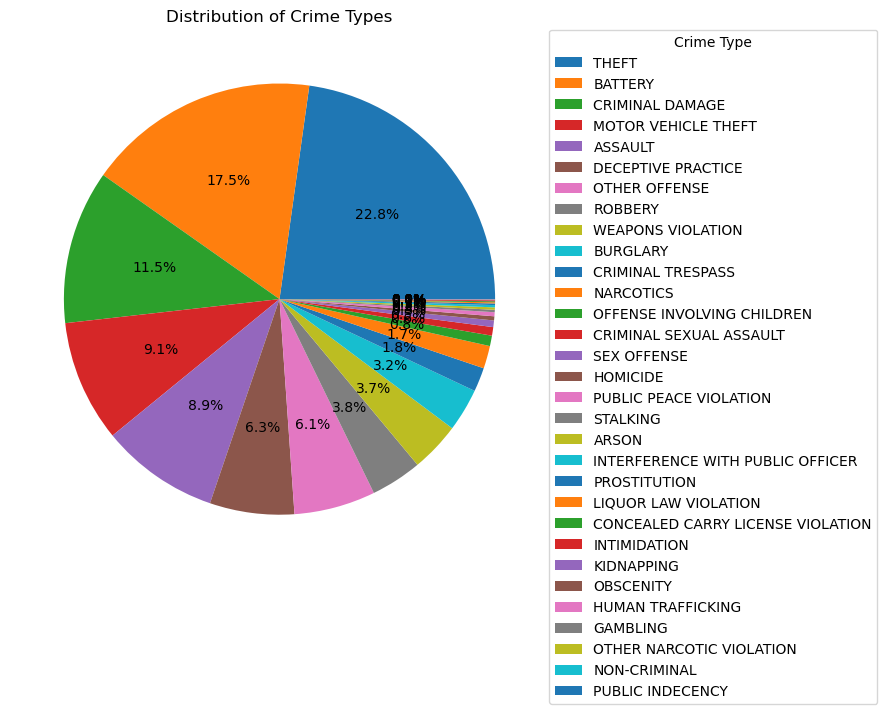

In [14]:

# Count the occurrences of each crime type
crime_counts = data['Primary Type'].value_counts()

# Sort the crime types by the number of crimes in descending order
crime_counts = crime_counts.sort_values(ascending=False)

# Create a pie chart using pandas
fig, ax = plt.subplots(figsize=(20, 7))
ax.pie(crime_counts.values, labels=None, autopct='%1.1f%%')
ax.set_title('Distribution of Crime Types')

# Show the plot
plt.legend(labels=crime_counts.index, bbox_to_anchor=(1,1), loc='upper left', borderaxespad=0, title='Crime Type')
plt.show()

Theft is choosen as it is the highest type of crime rate 

In [15]:
theft = data[data['Primary Type'].str.startswith('THEFT')]
theft

,Date,Primary Type,Description,Arrest,X Coordinate,Y Coordinate,Latitude,Longitude
53,2022-12-31 22:30:00,THEFT,FROM BUILDING,False,1179396.0,1903711.0,41.891070,-87.616614
82,2022-12-31 21:50:00,THEFT,OVER $500,False,1137758.0,1867507.0,41.792574,-87.770402
99,2022-12-31 21:12:00,THEFT,RETAIL THEFT,False,1161020.0,1870793.0,41.801141,-87.685012
105,2022-12-31 21:00:00,THEFT,OVER $500,False,1155665.0,1890311.0,41.854810,-87.704127
111,2022-12-31 21:00:00,THEFT,$500 AND UNDER,False,1177991.0,1856429.0,41.761357,-87.623209
...,...,...,...,...,...,...,...,...
237329,2022-01-01 00:00:00,THEFT,$500 AND UNDER,False,1148721.0,1913242.0,41.917872,-87.729022
237333,2022-01-01 00:00:00,THEFT,OVER $500,False,1159793.0,1874504.0,41.811350,-87.689410
237341,2022-01-01 00:00:00,THEFT,$500 AND UNDER,False,1171333.0,1891003.0,41.856380,-87.646598
237350,2022-01-01 00:00:00,THEFT,POCKET-PICKING,False,1171576.0,1915192.0,41.922751,-87.644994


Plotting theft by the months. To do so we have to separate our Date into monthly and hoursly by creating a new column 'Month' and 'Hour'

In [16]:
# Convert the 'Date' column to datetime format
theft['Date'] =  pd.to_datetime(theft['Date'])

# Extract the month and hourly information using the 'dt' accessor
theft['Month'] = theft['Date'].dt.month
theft['Hour'] = theft['Date'].dt.strftime('%H:%M:%S')

C:\Users\zohar\AppData\Local\Temp\ipykernel_35392\3877458148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft['Date'] =  pd.to_datetime(theft['Date'])
C:\Users\zohar\AppData\Local\Temp\ipykernel_35392\3877458148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft['Month'] = theft['Date'].dt.month
C:\Users\zohar\AppData\Local\Temp\ipykernel_35392\3877458148.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [17]:
theft.columns

Index(['Date', 'Primary Type', 'Description', 'Arrest', 'X Coordinate',
       'Y Coordinate', 'Latitude', 'Longitude', 'Month', 'Hour'],
      dtype='object')

In [18]:
theft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53138 entries, 53 to 237355
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          53138 non-null  datetime64[ns]
 1   Primary Type  53138 non-null  object        
 2   Description   53138 non-null  object        
 3   Arrest        53138 non-null  bool          
 4   X Coordinate  53138 non-null  float64       
 5   Y Coordinate  53138 non-null  float64       
 6   Latitude      53138 non-null  float64       
 7   Longitude     53138 non-null  float64       
 8   Month         53138 non-null  int64         
 9   Hour          53138 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 4.1+ MB


In [19]:
theft.head()

,Date,Primary Type,Description,Arrest,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Hour
53,2022-12-31 22:30:00,THEFT,FROM BUILDING,False,1179396.0,1903711.0,41.891070,-87.616614,12,22:30:00
82,2022-12-31 21:50:00,THEFT,OVER $500,False,1137758.0,1867507.0,41.792574,-87.770402,12,21:50:00
99,2022-12-31 21:12:00,THEFT,RETAIL THEFT,False,1161020.0,1870793.0,41.801141,-87.685012,12,21:12:00
105,2022-12-31 21:00:00,THEFT,OVER $500,False,1155665.0,1890311.0,41.854810,-87.704127,12,21:00:00
111,2022-12-31 21:00:00,THEFT,$500 AND UNDER,False,1177991.0,1856429.0,41.761357,-87.623209,12,21:00:00


In [20]:
theft_month = pd.DataFrame(theft['Month'].value_counts())
theft_month.iloc[:,]

,Month
7,5620
8,5146
10,5123
9,5017
6,4971
11,4577
5,4443
3,3956
12,3932
4,3880


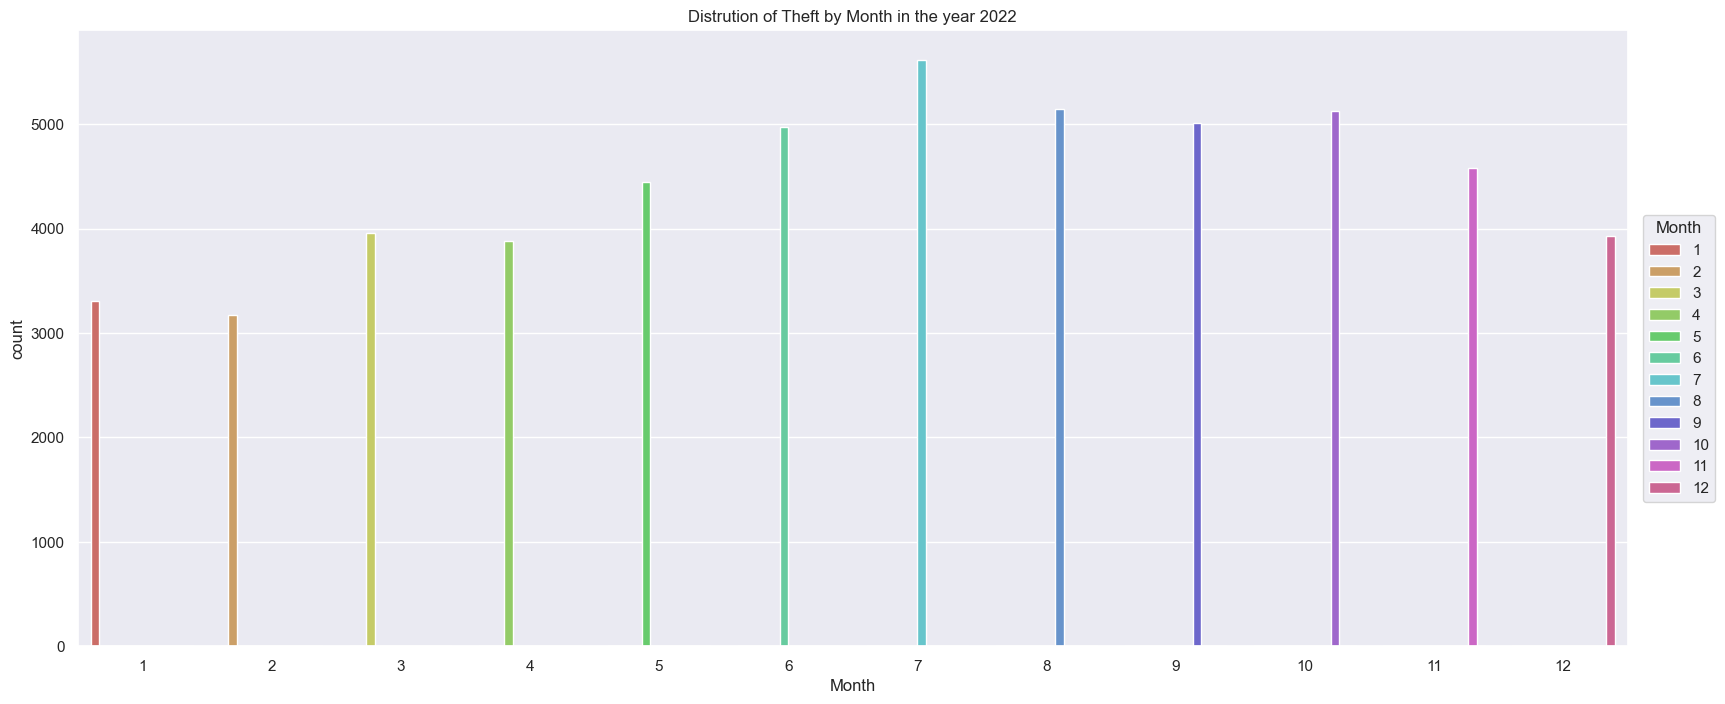

In [21]:
sns.set(rc={'figure.figsize': (20,8)})
graph = sns.countplot(x ='Month', data = theft, hue = 'Month', palette= 'hls').set(title='Distrution of Theft by Month in the year 2022')
plt.legend(bbox_to_anchor=(1.01, 0.7), loc='upper left', borderaxespad=0, title='Month')



EDA on the hourly

In [22]:
theft.head()

,Date,Primary Type,Description,Arrest,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Hour
53,2022-12-31 22:30:00,THEFT,FROM BUILDING,False,1179396.0,1903711.0,41.891070,-87.616614,12,22:30:00
82,2022-12-31 21:50:00,THEFT,OVER $500,False,1137758.0,1867507.0,41.792574,-87.770402,12,21:50:00
99,2022-12-31 21:12:00,THEFT,RETAIL THEFT,False,1161020.0,1870793.0,41.801141,-87.685012,12,21:12:00
105,2022-12-31 21:00:00,THEFT,OVER $500,False,1155665.0,1890311.0,41.854810,-87.704127,12,21:00:00
111,2022-12-31 21:00:00,THEFT,$500 AND UNDER,False,1177991.0,1856429.0,41.761357,-87.623209,12,21:00:00


In [23]:
# convert Hour column to datetime format
theft['Hour_Only'] = pd.to_datetime(theft['Hour'], format='%H:%M:%S').dt.hour

# define function to categorize hours
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# apply categorize_hour function to Hour column
theft['Part of Day'] = theft['Hour_Only'].apply(categorize_hour)

# print resulting dataframe
print(theft)

                      Date Primary Type     Description  Arrest  X Coordinate  \
53     2022-12-31 22:30:00        THEFT   FROM BUILDING   False     1179396.0   
82     2022-12-31 21:50:00        THEFT       OVER $500   False     1137758.0   
99     2022-12-31 21:12:00        THEFT    RETAIL THEFT   False     1161020.0   
105    2022-12-31 21:00:00        THEFT       OVER $500   False     1155665.0   
111    2022-12-31 21:00:00        THEFT  $500 AND UNDER   False     1177991.0   
...                    ...          ...             ...     ...           ...   
237329 2022-01-01 00:00:00        THEFT  $500 AND UNDER   False     1148721.0   
237333 2022-01-01 00:00:00        THEFT       OVER $500   False     1159793.0   
237341 2022-01-01 00:00:00        THEFT  $500 AND UNDER   False     1171333.0   
237350 2022-01-01 00:00:00        THEFT  POCKET-PICKING   False     1171576.0   
237355 2022-01-01 00:00:00        THEFT       OVER $500   False     1165777.0   

        Y Coordinate   Lati

C:\Users\zohar\AppData\Local\Temp\ipykernel_35392\206713420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft['Hour_Only'] = pd.to_datetime(theft['Hour'], format='%H:%M:%S').dt.hour
C:\Users\zohar\AppData\Local\Temp\ipykernel_35392\206713420.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft['Part of Day'] = theft['Hour_Only'].apply(categorize_hour)


In [24]:
theft.columns

Index(['Date', 'Primary Type', 'Description', 'Arrest', 'X Coordinate',
       'Y Coordinate', 'Latitude', 'Longitude', 'Month', 'Hour', 'Hour_Only',
       'Part of Day'],
      dtype='object')

In [25]:
theft.info

<bound method DataFrame.info of                       Date Primary Type     Description  Arrest  X Coordinate  \
53     2022-12-31 22:30:00        THEFT   FROM BUILDING   False     1179396.0   
82     2022-12-31 21:50:00        THEFT       OVER $500   False     1137758.0   
99     2022-12-31 21:12:00        THEFT    RETAIL THEFT   False     1161020.0   
105    2022-12-31 21:00:00        THEFT       OVER $500   False     1155665.0   
111    2022-12-31 21:00:00        THEFT  $500 AND UNDER   False     1177991.0   
...                    ...          ...             ...     ...           ...   
237329 2022-01-01 00:00:00        THEFT  $500 AND UNDER   False     1148721.0   
237333 2022-01-01 00:00:00        THEFT       OVER $500   False     1159793.0   
237341 2022-01-01 00:00:00        THEFT  $500 AND UNDER   False     1171333.0   
237350 2022-01-01 00:00:00        THEFT  POCKET-PICKING   False     1171576.0   
237355 2022-01-01 00:00:00        THEFT       OVER $500   False     1165777.0

In [26]:
theft.head()

,Date,Primary Type,Description,Arrest,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Hour,Hour_Only,Part of Day
53,2022-12-31 22:30:00,THEFT,FROM BUILDING,False,1179396.0,1903711.0,41.891070,-87.616614,12,22:30:00,22,Night
82,2022-12-31 21:50:00,THEFT,OVER $500,False,1137758.0,1867507.0,41.792574,-87.770402,12,21:50:00,21,Night
99,2022-12-31 21:12:00,THEFT,RETAIL THEFT,False,1161020.0,1870793.0,41.801141,-87.685012,12,21:12:00,21,Night
105,2022-12-31 21:00:00,THEFT,OVER $500,False,1155665.0,1890311.0,41.854810,-87.704127,12,21:00:00,21,Night
111,2022-12-31 21:00:00,THEFT,$500 AND UNDER,False,1177991.0,1856429.0,41.761357,-87.623209,12,21:00:00,21,Night


In [27]:
theft_part_the_day = pd.DataFrame(theft['Part of Day'].value_counts())
theft_part_the_day.iloc[:,]

,Part of Day
Afternoon,15099
Night,13877
Morning,12258
Evening,11904


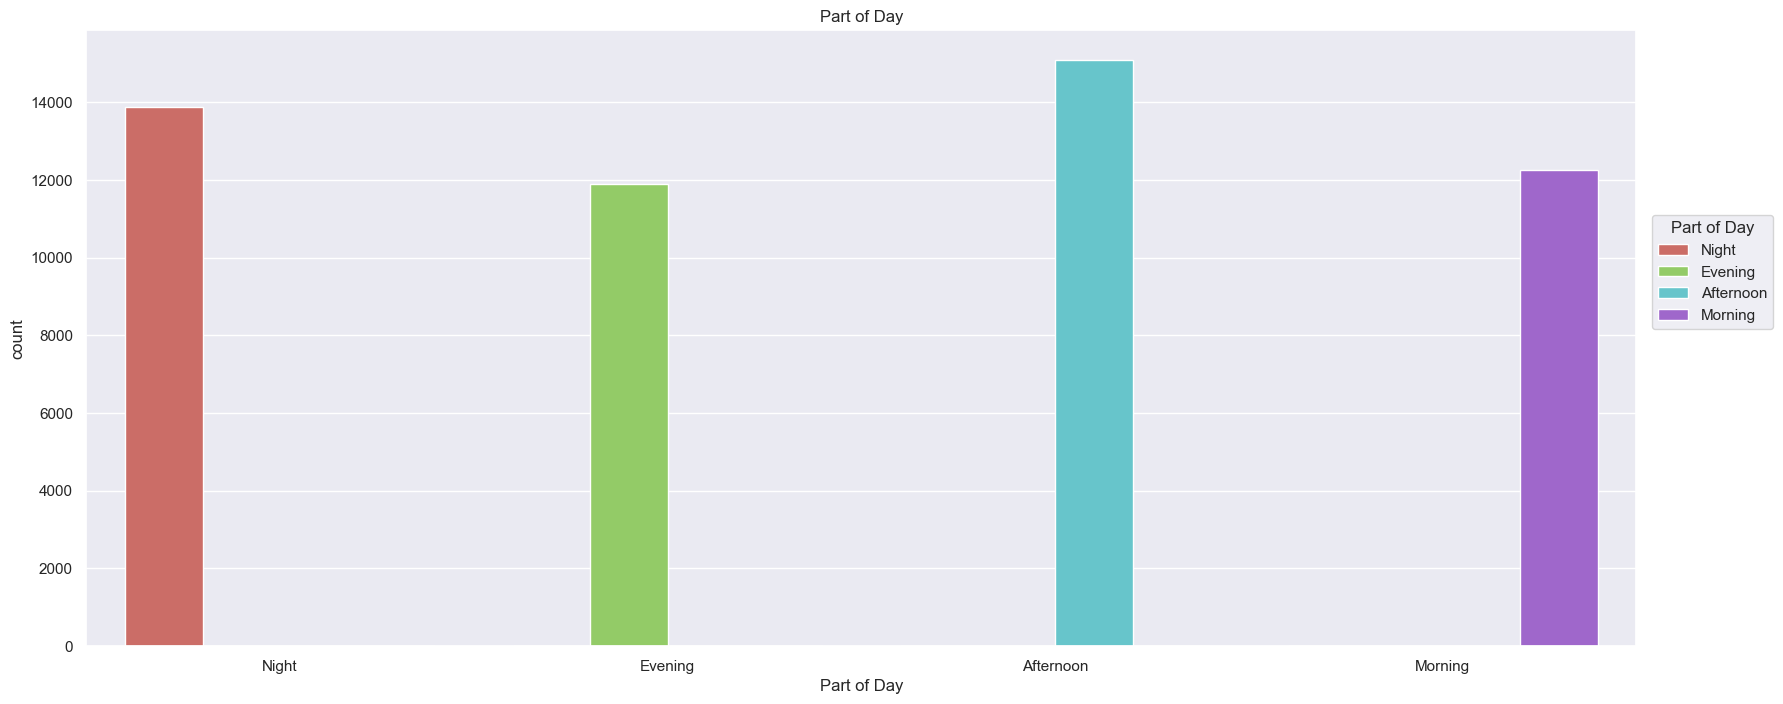

In [28]:
sns.set(rc={'figure.figsize': (20,8)})
graph = sns.countplot(x ='Part of Day', data = theft, hue = 'Part of Day', palette= 'hls').set(title='Part of Day')
plt.legend(bbox_to_anchor=(1.01, 0.7), loc='upper left', borderaxespad=0, title='Part of Day')



## 4. Preprocessing Shapefile

In [37]:
chicago = gpd.read_file('geo_export_73a318ef-b1d6-4a87-8ba4-2133e54e3482.shp')

In [38]:
chicago.columns

Index(['area', 'area_num_1', 'area_numbe', 'comarea', 'comarea_id',
       'community', 'perimeter', 'shape_area', 'shape_len', 'geometry'],
      dtype='object')

<AxesSubplot:>

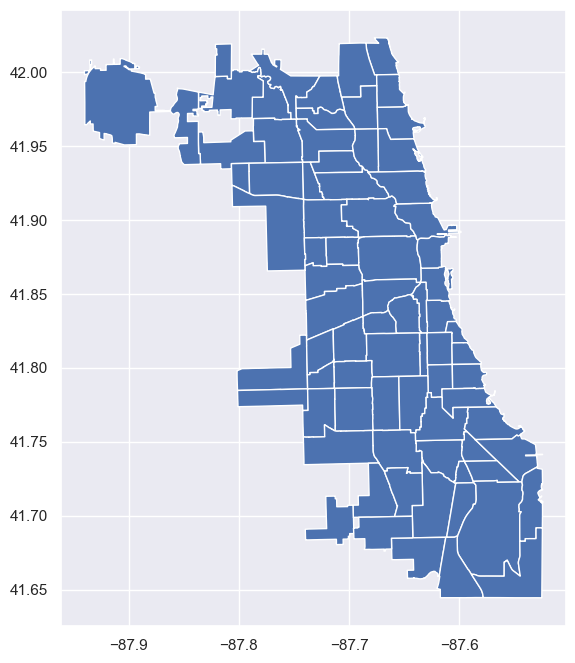

In [39]:
chicago.plot()

In [40]:
chicago.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich